<a href="https://colab.research.google.com/github/NizarArdansyah/Capstone-Project-Machine-Learning/blob/main/Cluster_2_Crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [2]:
data_df = pd.read_csv('cluster_2_int.csv')
#data_df = pd.read_csv('Crop_recommendation.csv', index_col='label')
data_df.head()

,temperature,humidity,label,cluster
0,18,17,buncis,2
1,20,18,buncis,2
2,18,16,buncis,2
3,19,16,buncis,2
4,19,20,buncis,2


In [3]:
data_df.describe()

,temperature,humidity,cluster
count,227.000000,227.000000,227.0
mean,20.960352,21.577093,2.0
std,3.935679,5.929304,0.0
min,16.000000,15.000000,2.0
25%,19.000000,18.000000,2.0
50%,20.000000,20.000000,2.0
75%,21.000000,24.000000,2.0
max,37.000000,40.000000,2.0


In [4]:
data_df.shape

(227, 4)

In [5]:
data_df.dtypes

temperature     int64
humidity        int64
label          object
cluster         int64
dtype: object

In [6]:
data_df.isnull().sum()

temperature    0
humidity       0
label          0
cluster        0
dtype: int64

In [7]:
data_df[data_df.duplicated()]

,temperature,humidity,label,cluster
9,19,19,buncis,2
13,19,20,buncis,2
15,19,20,buncis,2
16,21,20,buncis,2
17,21,17,buncis,2
...,...,...,...,...
199,19,21,kacang merah,2
214,19,35,kacang polong,2
222,32,36,kacang polong,2
223,31,35,kacang polong,2


In [8]:
data_df.describe()

,temperature,humidity,cluster
count,227.000000,227.000000,227.0
mean,20.960352,21.577093,2.0
std,3.935679,5.929304,0.0
min,16.000000,15.000000,2.0
25%,19.000000,18.000000,2.0
50%,20.000000,20.000000,2.0
75%,21.000000,24.000000,2.0
max,37.000000,40.000000,2.0


In [9]:
data_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   temperature  227 non-null    int64 
 1   humidity     227 non-null    int64 
 2   label        227 non-null    object
 3   cluster      227 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.2+ KB


In [10]:
data_df['label'].value_counts()

buncis           100
kacang merah     100
kacang polong     27
Name: label, dtype: int64

# Identifikasi Nilai Outlier

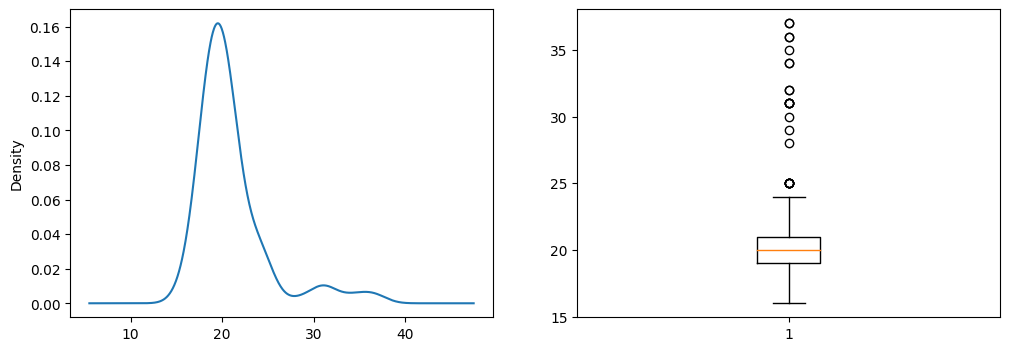

In [11]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_df['temperature'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_df['temperature'])
plt.show()

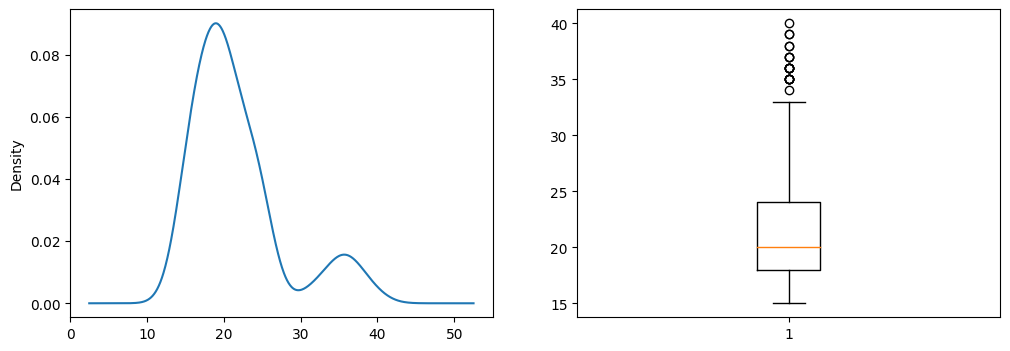

In [12]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_df['humidity'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_df['humidity'])
plt.show()

<Axes: xlabel='temperature'>

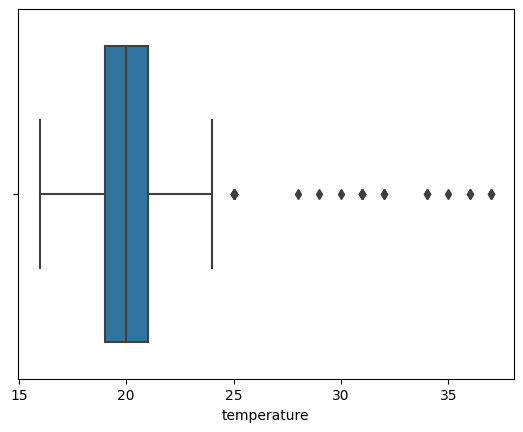

In [13]:
sns.boxplot(x=data_df['temperature'])

<Axes: xlabel='humidity'>

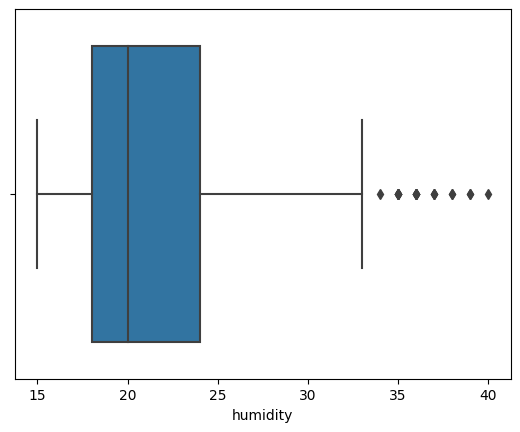

In [14]:
sns.boxplot(x=data_df['humidity'])

# Normalisasi data

In [15]:
#data_df = data_df.drop(['N', 'P', 'K', 'ph', 'rainfall'], axis = 1)
#data_df.head()

In [16]:
Q1 = data_df['temperature'].quantile(0.25)
Q3 = data_df['temperature'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 19.0

Q3:
 21.0

IQR:
 2.0

Min:
 16.0

Max:
 24.0


In [17]:
filter_min = data_df['temperature']<boxplot_min
filter_max = data_df['temperature']>boxplot_max
data_df = data_df[~(filter_min|filter_max)] 
data_df.shape

(203, 4)

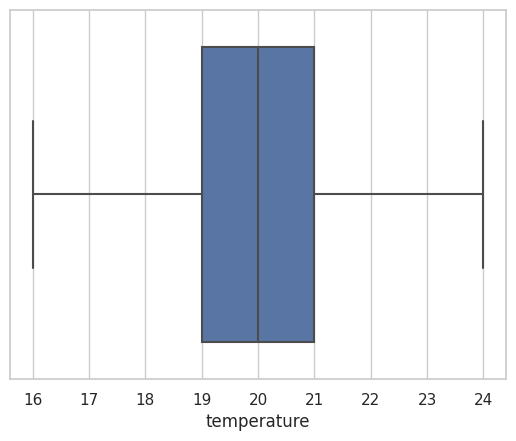

In [18]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_df['temperature'])

In [19]:
data_df.isnull().sum()

temperature    0
humidity       0
label          0
cluster        0
dtype: int64

In [20]:
# backup dataframe for encoding
data_df.to_csv('data_df.csv')
df_clean = data_df.copy()

In [21]:
df_clean.value_counts()

temperature  humidity  label          cluster
20           19        buncis         2          8
18           17        buncis         2          7
21           20        buncis         2          6
20           18        buncis         2          6
19           20        buncis         2          6
                                                ..
20           35        kacang polong  2          1
21           18        buncis         2          1
             19        buncis         2          1
             20        kacang merah   2          1
24           37        kacang polong  2          1
Length: 86, dtype: int64

In [22]:
df_clean.tail()

,temperature,humidity,label,cluster
214,19,35,kacang polong,2
216,20,33,kacang polong,2
221,21,40,kacang polong,2
224,24,37,kacang polong,2
225,20,34,kacang polong,2


In [23]:
for feat in df_clean.columns:
    hh = df_clean.groupby(feat)['label'].count()
    print(feat,',', 'Unique :',len(df_clean[feat].unique()))

temperature , Unique : 9
humidity , Unique : 17
label , Unique : 3
cluster , Unique : 1


# Visualisasi data

<ipython-input-24-3905aa958fbb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_clean.corr(), annot=True)


<Axes: >

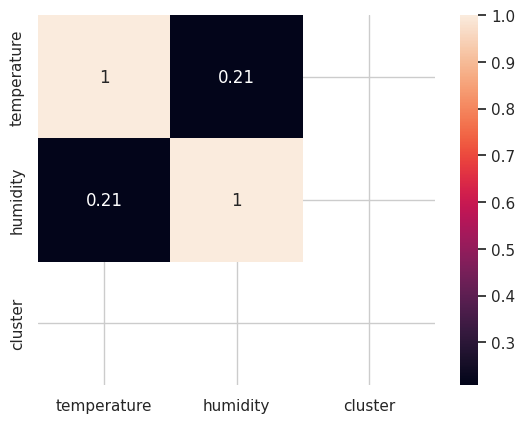

In [24]:
sns.heatmap(data=df_clean.corr(), annot=True)

In [25]:
df_clean.corr()

<ipython-input-25-798b28326b09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,temperature,humidity,cluster
temperature,1.000000,0.209369,NaN
humidity,0.209369,1.000000,NaN
cluster,NaN,NaN,NaN


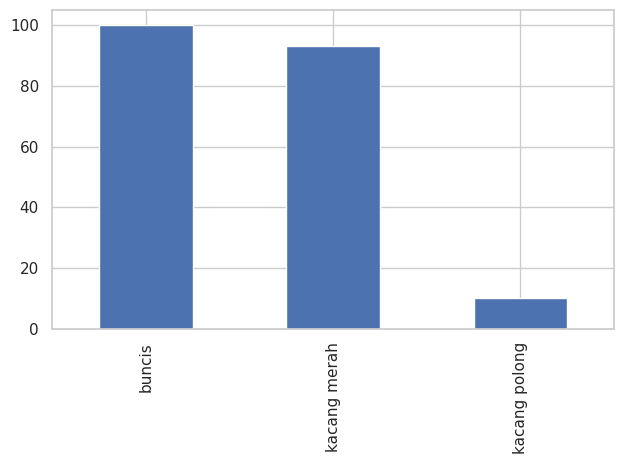

In [26]:
df_clean['label'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

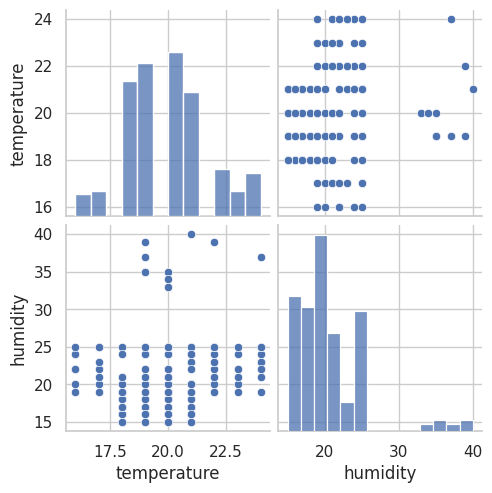

In [27]:
sns.pairplot(df_clean[[ 'temperature', 'humidity']])

In [ ]:
# X = data_df[data_df.columns[:-1]].values
# y = data_df[data_df.columns[-1]].values

# X.shape

(2019,)

# **Data Sintetik**

In [ ]:
# pip install imbalanced-learn scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Menampilkan jumlah sampel sebelum SMOTE
print("Jumlah sampel sebelum SMOTE:")
print(df_clean['label'].value_counts())
print("=============================")

# Memisahkan fitur dan target
X = df_clean[['temperature', 'humidity']]
y = df_clean['label']

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Membentuk dataset baru setelah SMOTE
# data_res = pd.DataFrame({
#     'temperature': X_res[:, 0],
#     'humidity': X_res[:, 1],
#     'label': y_res
# })

# Menampilkan jumlah sampel setelah SMOTE
print("\nJumlah sampel setelah SMOTE:")
print(y_res.value_counts())

Jumlah sampel sebelum SMOTE:
buncis           100
kacang merah      93
kacang polong     10
Name: label, dtype: int64

Jumlah sampel setelah SMOTE:
buncis           100
kacang merah     100
kacang polong    100
Name: label, dtype: int64


# **Klasifikasi model**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn import tree

# **Dataset features dan class label**

In [ ]:
# X = df_clean[['temperature', 'humidity']] #input features ke dalam x
# X.head()

In [ ]:
# y = df_clean['label'] #label masuk ke variabel y
# y.head()

0    padi
1    padi
2    padi
3    padi
4    padi
Name: label, dtype: object

# **Split dataset ke training set dan testing set**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=10)

print('training dataset:')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset:
(240, 2)
(240,)

testing dataset:
(60, 2)
(60,)


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 

# **Decission tree**

In [32]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train,y_train)
predicted_values = DecisionTree.predict(X_test)

**Accuracy** **Score**

In [33]:
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("DecisionTrees's Accuracy Score is: ", x)

DecisionTrees's Accuracy Score is:  0.95


**Classification report**

In [34]:
print(classification_report(y_test,predicted_values)) #classification report

               precision    recall  f1-score   support

       buncis       0.85      1.00      0.92        17
 kacang merah       1.00      0.84      0.91        19
kacang polong       1.00      1.00      1.00        24

     accuracy                           0.95        60
    macro avg       0.95      0.95      0.94        60
 weighted avg       0.96      0.95      0.95        60



**Confusion matrix**

In [ ]:
print(confusion_matrix(y_test, predicted_values)) #confusion matrix

[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  3  0  1  0  0  0  0  0  0]
 [ 0  4  0  3  0  8  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  9  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  2  0  4  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  1  0  2  4  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  6  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  1  0  0 12  0  3  1  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0]
 [ 0  0  0

In [35]:
from sklearn.model_selection import cross_val_score


In [36]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, X, y,cv=5)
score

array([0.87804878, 0.90243902, 0.85365854, 0.95      , 0.975     ])

# KNN

In [37]:
accuracies = []
for k in range(1, 25):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    y_pred_test = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracies.append(accuracy)
for k in range(1,25):
    print("k = ", k, " => Akurasi = ", np.round(accuracies[k-1], 2)) 

k =  1  => Akurasi =  0.92
k =  2  => Akurasi =  0.93
k =  3  => Akurasi =  0.93
k =  4  => Akurasi =  0.97
k =  5  => Akurasi =  0.97
k =  6  => Akurasi =  0.97
k =  7  => Akurasi =  0.95
k =  8  => Akurasi =  0.95
k =  9  => Akurasi =  0.93
k =  10  => Akurasi =  0.93
k =  11  => Akurasi =  0.97
k =  12  => Akurasi =  0.97
k =  13  => Akurasi =  0.95
k =  14  => Akurasi =  0.97
k =  15  => Akurasi =  0.97
k =  16  => Akurasi =  0.95
k =  17  => Akurasi =  0.95
k =  18  => Akurasi =  0.95
k =  19  => Akurasi =  0.97
k =  20  => Akurasi =  0.93
k =  21  => Akurasi =  0.97
k =  22  => Akurasi =  0.95
k =  23  => Akurasi =  0.97
k =  24  => Akurasi =  0.97


In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.ravel())
predicted_values = knn.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("KNN's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

KNN's Accuracy Score is:  0.9666666666666667
               precision    recall  f1-score   support

       buncis       0.89      1.00      0.94        17
 kacang merah       1.00      0.89      0.94        19
kacang polong       1.00      1.00      1.00        24

     accuracy                           0.97        60
    macro avg       0.96      0.96      0.96        60
 weighted avg       0.97      0.97      0.97        60



# Naive bayes

In [39]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
predicted_values = gnb.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("Naive Bayes's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

Naive Bayes's Accuracy Score is:  0.9666666666666667
               precision    recall  f1-score   support

       buncis       0.94      0.94      0.94        17
 kacang merah       0.95      0.95      0.95        19
kacang polong       1.00      1.00      1.00        24

     accuracy                           0.97        60
    macro avg       0.96      0.96      0.96        60
 weighted avg       0.97      0.97      0.97        60



# Random forest

In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.ravel())
predicted_values = rfc.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("RFC's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

RFC's Accuracy Score is:  0.95
               precision    recall  f1-score   support

       buncis       0.89      0.94      0.91        17
 kacang merah       0.94      0.89      0.92        19
kacang polong       1.00      1.00      1.00        24

     accuracy                           0.95        60
    macro avg       0.94      0.95      0.94        60
 weighted avg       0.95      0.95      0.95        60

